## Langgraph pipeline diagram - Crime Report Analysis

In [4]:
from graphviz import Digraph

In [5]:
def generate_langgraph_pipeline_diagram(filename="crime_analysis_langgraph"):
    """Generates a visualization of the LangGraph pipeline for the crime analysis system."""
    from graphviz import Digraph
    
    dot = Digraph(comment='LangGraph Crime Analysis Pipeline')
    dot.attr(rankdir='LR', bgcolor='white', fontname='Helvetica')
    dot.attr('node', fontname='Helvetica', fontsize='12', style='filled', fontcolor='black', margin='0.4')
    dot.attr('edge', fontname='Helvetica', fontsize='10', penwidth='1.5')

    # Nodes - matching the pipeline structure
    dot.node('start', 'Start Node\n(Input Processing)', shape='oval', style='filled', fillcolor='#4CAF50', color='#2E7D32')
    
    # Parallel processing subgraph
    with dot.subgraph(name='cluster_parallel') as c:
        c.attr(label='Parallel Data Gathering', style='filled', color='lightgrey', fontcolor='black')
        c.node('web_search', 'Web Search\nNode', shape='box', style='filled', fillcolor='#2196F3', color='#0D47A1')
        c.node('rag', 'RAG\nNode', shape='box', style='filled', fillcolor='#03A9F4', color='#0277BD')
        c.node('snowflake', 'Snowflake\nNode', shape='box', style='filled', fillcolor='#00BCD4', color='#006064')
        c.node('parallel_result', 'Combined Results', shape='point', style='filled', fillcolor='black')
        
        c.edge('web_search', 'parallel_result')
        c.edge('rag', 'parallel_result')
        c.edge('snowflake', 'parallel_result')
    
    # Remaining nodes in processing order
    dot.node('contextual_img', 'Contextual Image\nGeneration', shape='box', style='filled', fillcolor='#673AB7', color='#311B92')
    dot.node('comparison', 'Comparison\nAnalysis', shape='box', style='filled', fillcolor='#3F51B5', color='#1A237E')
    dot.node('forecast', 'Forecast\nGeneration', shape='box', style='filled', fillcolor='#9C27B0', color='#4A148C')
    dot.node('safety', 'Safety\nAssessment', shape='box', style='filled', fillcolor='#E91E63', color='#880E4F')
    dot.node('organization', 'Report\nOrganization', shape='box', style='filled', fillcolor='#FF9800', color='#E65100')
    dot.node('report_generation', 'Report\nGeneration', shape='note', style='filled', fillcolor='#FFC107', color='#FF6F00')
    dot.node('judge', 'Judge\nEvaluation', shape='diamond', style='filled', fillcolor='#607D8B', color='#263238')
    dot.node('end', 'End', shape='oval', style='filled', fillcolor='#F44336', color='#B71C1C')

    # Edges showing pipeline flow
    dot.edge('start', 'web_search', color='#2196F3')
    dot.edge('start', 'rag', color='#03A9F4')
    dot.edge('start', 'snowflake', color='#00BCD4')
    
    dot.edge('parallel_result', 'contextual_img', label='if snowflake_output exists')
    dot.edge('contextual_img', 'comparison')
    dot.edge('comparison', 'forecast')
    dot.edge('forecast', 'safety')
    dot.edge('safety', 'organization')
    dot.edge('organization', 'report_generation')
    dot.edge('report_generation', 'judge')
    dot.edge('judge', 'end')

    # Add conditional path annotation
    dot.node('condition', 'Conditional Check:\nIs Snowflake Output Complete?', 
             shape='note', style='filled', fillcolor='#FDD835', color='#F57F17',
             fontsize='10')
    dot.edge('parallel_result', 'condition', style='dashed', arrowhead='none')
    dot.edge('condition', 'contextual_img', style='dashed', arrowhead='none')

    # Save the diagram
    try:
        dot.render(filename, format='png', cleanup=True)
        return f"{filename}.png"
    except Exception as e:
        print(f"Warning: Could not generate diagram: {e}")
        return None

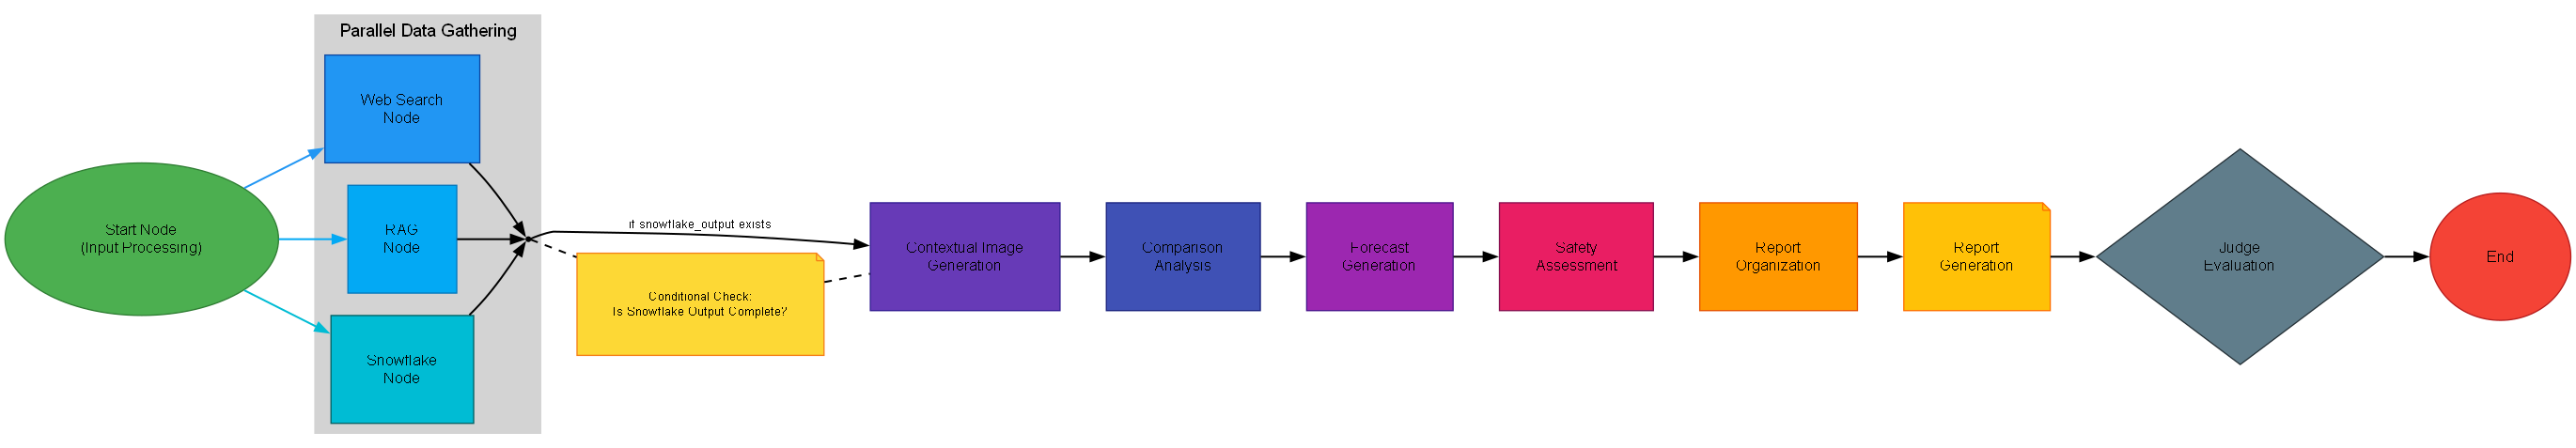

In [6]:
from IPython.display import Image as IPImage, display

# Generate and display the LangGraph pipeline diagram
pipeline_diagram_path = generate_langgraph_pipeline_diagram()
if pipeline_diagram_path:
    display(IPImage(pipeline_diagram_path))
else:
    print("Failed to generate pipeline diagram")